In [1]:
import numpy as np
def integrate(f,a,b,N):
    """integrates f using Chebyshev-Gauss Quadrature"""
    xi = np.cos(np.pi*(1-np.linspace(0,1,N+1))) ## [-1,1] Chebyshev points
    wi = np.pi/N*(1-xi**2)**0.5 ## weights
    xi = a+(b-a)*(xi+1.0)/2.0 ## mapping to interval [a,b]
    wi*=(b-a)/2.0 ## adjusting weights to reflect mapped domain
    return(sum(wi*f(xi)))

In [2]:
def innerproduct(f,g,a,b,N):
    return(integrate(lambda x: f(x)*g(x),a,b,N))

In [14]:
## I need to learn Sympy

In [22]:
functions = [
    lambda x: 1,
    lambda x: x,
    lambda x: x**2,
    lambda x: x**3
            ]
A = []
for i in range(0,len(functions)):

    row = []
    for j in range (0,len(functions)):
        row.append(innerproduct(functions[i],functions[j],0,1,100))
    A.append(row)


In [23]:
A

[[0.99991775194372168,
  0.49995887597186089,
  0.33329220727536107,
  0.24995887292711128],
 [0.49995887597186089,
  0.33329220727536107,
  0.24995887292711128,
  0.1999588719119561],
 [0.33329220727536107,
  0.24995887292711128,
  0.1999588719119561,
  0.16662553756334827],
 [0.24995887292711128,
  0.1999588719119561,
  0.16662553756334827,
  0.14281601273843061]]

In [24]:
## Galerkin on exp[x]

b = []
for i in range(0,len(functions)):
    b.append(innerproduct(functions[i],lambda x: np.exp(x) ,0,1,100))

In [25]:
b

[1.7181289159885733,
 0.99988820879877849,
 0.71817003348387243,
 0.56332454534737841]

In [28]:
c = np.dot(np.linalg.inv(A), b) 

In [30]:
c

array([ 0.99905961,  1.01830217,  0.4212448 ,  0.27862448])

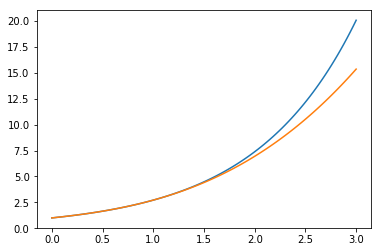

In [31]:
import matplotlib.pyplot as plt
domain = np.linspace(0,3,100)
exp = np.exp(domain)
myF = lambda x: c[0]+c[1]*x+c[2]*x**2+c[3]*x**3
plt.plot(domain,exp)
plt.plot(domain,myF(domain))
plt.show()